In [1]:
import pandas as pd
import warnings
import numpy as np
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from imblearn.over_sampling import SMOTE

import scipy.stats as sts




In [3]:

file_path = 'household_power_consumption.txt'

#df = pd.read_csv(file_path, sep=';', parse_dates=[[0, 1]], dayfirst=True)

df = pd.read_csv(file_path, sep=';')

df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.set_index('DateTime', inplace=True)

df.drop(['Date', 'Time'], axis=1, inplace=True)


#df.rename(columns={'Date_Time': 'Datetime'}, inplace=True)

print(df.head())

                    Global_active_power Global_reactive_power  Voltage  \
DateTime                                                                 
2006-12-16 17:24:00               4.216                 0.418  234.840   
2006-12-16 17:25:00               5.360                 0.436  233.630   
2006-12-16 17:26:00               5.374                 0.498  233.290   
2006-12-16 17:27:00               5.388                 0.502  233.740   
2006-12-16 17:28:00               3.666                 0.528  235.680   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
DateTime                                                             
2006-12-16 17:24:00           18.400          0.000          1.000   
2006-12-16 17:25:00           23.000          0.000          1.000   
2006-12-16 17:26:00           23.000          0.000          2.000   
2006-12-16 17:27:00           23.000          0.000          1.000   
2006-12-16 17:28:00           15.800          0.000          

In [5]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0


In [47]:
df.to_csv("Household_power_consumption.csv")

In [7]:
df.shape

(2075259, 7)

In [9]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [11]:
df.dtypes

Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [15]:
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [17]:
df['Global_active_power'].value_counts()

Global_active_power
?        25979
0.218     9491
0.216     9319
0.322     9226
0.324     9153
         ...  
9.116        1
9.160        1
7.340        1
3.772        1
3.74         1
Name: count, Length: 6534, dtype: int64

In [19]:
df['Global_reactive_power'].value_counts()

Global_reactive_power
0.000    472786
?         25979
0.100     21577
0.102     21473
0.098     21466
          ...  
0.636         1
1.108         1
1.030         1
0.658         1
0.69          1
Name: count, Length: 896, dtype: int64

In [21]:
df['Voltage'].value_counts()

Voltage
?          25979
241.180     3519
241.020     3251
241.120     3247
241.350     3231
           ...  
253.750        1
253.530        1
252.810        1
253.040        1
230.31         1
Name: count, Length: 5168, dtype: int64

In [23]:
df['Global_intensity'].value_counts()

Global_intensity
1.000     169406
1.400     160480
1.200     138153
1.600     115873
1.800      93189
           ...  
26.6           1
44.400         1
45.800         1
28.8           1
48.400         1
Name: count, Length: 377, dtype: int64

In [25]:
df['Sub_metering_1'].value_counts()

Sub_metering_1
0.000    1840611
1.000      82920
0.0        39564
?          25979
2.000      18537
          ...   
72.0           1
81.0           1
76.0           1
63.0           1
57.0           1
Name: count, Length: 153, dtype: int64

In [27]:
df['Sub_metering_2'].value_counts()

Sub_metering_2
0.000    1408274
1.000     367317
2.000     153938
0.0        28556
?          25979
          ...   
61.0           1
60.0           1
56.0           1
51.0           1
15.0           1
Name: count, Length: 145, dtype: int64

In [29]:
df['Sub_metering_3'].value_counts()

Sub_metering_3
0.0     852092
1.0     471868
18.0    353163
17.0    156593
19.0    121326
12.0     16726
16.0     15831
11.0     11282
29.0      6931
13.0      5339
20.0      4670
28.0      4364
10.0      3309
30.0      3119
9.0       2011
6.0       1993
2.0       1970
7.0       1954
3.0       1935
8.0       1922
4.0       1913
5.0       1899
27.0      1337
26.0       771
21.0       726
23.0       714
22.0       700
25.0       689
24.0       664
15.0       653
14.0       538
31.0       278
Name: count, dtype: int64

In [31]:
df['Sub_metering_1'].unique()

array(['0.000', '1.000', '2.000', '6.000', '37.000', '36.000', '38.000',
       '25.000', '12.000', '11.000', '9.000', '4.000', '33.000', '5.000',
       '34.000', '8.000', '26.000', '27.000', '15.000', '20.000',
       '21.000', '23.000', '16.000', '10.000', '39.000', '32.000', '?',
       '19.000', '35.000', '30.000', '40.000', '7.000', '31.000',
       '17.000', '3.000', '29.000', '24.000', '14.000', '41.000',
       '53.000', '76.000', '75.000', '77.000', '74.000', '28.000',
       '68.000', '58.000', '62.000', '13.000', '18.000', '22.000',
       '64.000', '71.000', '56.000', '72.000', '45.000', '42.000',
       '59.000', '66.000', '43.000', '44.000', '48.000', '46.000',
       '73.000', '55.000', '60.000', '70.000', '63.000', '67.000',
       '47.000', '65.000', '51.000', '50.000', '69.000', '78.000',
       '57.000', '49.000', '61.000', '52.000', '54.000', '79.000',
       '80.000', '81.000', '82.000', '83.000', '84.000', '88.000',
       '86.000', '87.000', 0.0, 1.0, 2.0, 40.0,

In [33]:
df['Sub_metering_2'].unique()

array(['1.000', '2.000', '0.000', '16.000', '37.000', '36.000', '22.000',
       '12.000', '27.000', '20.000', '9.000', '4.000', '3.000', '5.000',
       '13.000', '35.000', '28.000', '26.000', '24.000', '21.000',
       '17.000', '33.000', '25.000', '23.000', '18.000', '30.000',
       '31.000', '7.000', '38.000', '29.000', '50.000', '71.000',
       '59.000', '62.000', '70.000', '40.000', '34.000', '8.000',
       '15.000', '6.000', '32.000', '19.000', '14.000', '49.000',
       '72.000', '73.000', '61.000', '39.000', '42.000', '10.000',
       '56.000', '11.000', '?', '43.000', '67.000', '63.000', '53.000',
       '65.000', '52.000', '69.000', '48.000', '74.000', '41.000',
       '47.000', '58.000', '68.000', '64.000', '75.000', '46.000',
       '57.000', '60.000', '66.000', '44.000', '78.000', '77.000',
       '76.000', '51.000', '55.000', '45.000', '54.000', '79.000',
       '80.000', 0.0, 1.0, 2.0, 36.0, 40.0, 39.0, 41.0, 23.0, 10.0, 6.0,
       5.0, 18.0, 37.0, 28.0, 38.0, 9.0, 

In [35]:
df['Global_intensity'].unique()

array(['18.400', '23.000', '15.800', '15.000', '19.600', '23.200',
       '22.400', '22.600', '17.600', '14.200', '13.800', '14.400',
       '16.400', '25.400', '33.200', '30.600', '22.000', '19.400',
       '13.600', '13.400', '11.600', '19.200', '10.400', '11.800',
       '11.000', '21.000', '26.200', '29.000', '27.800', '27.000',
       '19.000', '9.600', '10.000', '21.400', '17.800', '12.000',
       '12.400', '15.200', '20.800', '15.600', '26.400', '18.800',
       '13.000', '9.800', '9.200', '13.200', '18.000', '10.800', '10.600',
       '18.200', '17.000', '17.400', '14.800', '14.600', '15.400',
       '14.000', '8.400', '9.400', '7.800', '8.200', '8.600', '11.400',
       '12.600', '9.000', '7.600', '12.800', '7.400', '5.600', '4.600',
       '7.200', '1.600', '2.400', '2.800', '1.200', '4.400', '4.000',
       '10.200', '6.800', '5.200', '6.000', '6.600', '8.000', '2.000',
       '4.800', '5.400', '16.600', '3.000', '1.800', '8.800', '1.400',
       '21.800', '20.200', '16.000

In [37]:
cols_to_convert = [
    'Global_active_power', 'Global_reactive_power', 'Voltage',
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2'
]


for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce').round(3)
pd.set_option('display.float_format', '{:.3f}'.format)

In [38]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.000
2010-11-26 20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.000
2010-11-26 21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.000


In [41]:
df['Sub_metering_2'].unique()

array([ 1.,  2.,  0., 16., 37., 36., 22., 12., 27., 20.,  9.,  4.,  3.,
        5., 13., 35., 28., 26., 24., 21., 17., 33., 25., 23., 18., 30.,
       31.,  7., 38., 29., 50., 71., 59., 62., 70., 40., 34.,  8., 15.,
        6., 32., 19., 14., 49., 72., 73., 61., 39., 42., 10., 56., 11.,
       nan, 43., 67., 63., 53., 65., 52., 69., 48., 74., 41., 47., 58.,
       68., 64., 75., 46., 57., 60., 66., 44., 78., 77., 76., 51., 55.,
       45., 54., 79., 80.])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [45]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [47]:
df.isnull().mean()* 100

Global_active_power     1.252
Global_reactive_power   1.252
Voltage                 1.252
Global_intensity        1.252
Sub_metering_1          1.252
Sub_metering_2          1.252
Sub_metering_3          1.252
dtype: float64

In [49]:
df['Sub_metering_3'].mean()

6.45844735712055

In [51]:
df['Sub_metering_2'].mean()

1.2985199679887571

In [53]:
df['Global_active_power'].fillna(df['Global_active_power'].mean(), inplace= True)
df['Global_reactive_power'].fillna(df['Global_reactive_power'].mean(), inplace= True)
df['Voltage'].fillna(df['Voltage'].mean(), inplace= True)
df['Global_intensity'].fillna(df['Global_intensity'].mean(), inplace= True)
df['Sub_metering_1'].fillna(df['Sub_metering_1'].mean(), inplace= True)
df['Sub_metering_2'].fillna(df['Sub_metering_2'].mean(), inplace= True)
df['Sub_metering_3'].fillna(df['Sub_metering_3'].mean(), inplace= True)

In [55]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [59]:
df.duplicated().sum() 

168560

In [57]:
df[df.duplicated()]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-17 18:09:00,3.236,0.000,235.840,13.600,0.000,0.000,17.000
2006-12-18 00:04:00,0.206,0.000,245.980,0.800,0.000,0.000,0.000
2006-12-18 00:47:00,0.202,0.000,243.790,0.800,0.000,0.000,0.000
2006-12-18 01:54:00,0.276,0.096,243.610,1.200,0.000,0.000,0.000
2006-12-18 02:56:00,0.304,0.148,247.810,1.400,0.000,0.000,0.000
...,...,...,...,...,...,...,...
2010-11-26 14:41:00,1.264,0.060,238.420,5.200,0.000,0.000,17.000
2010-11-26 15:18:00,1.272,0.060,239.760,5.200,0.000,0.000,18.000
2010-11-26 15:46:00,0.328,0.046,242.060,1.400,0.000,0.000,0.000


In [61]:
df_cleaned = df.drop_duplicates()

In [65]:
df_cleaned.duplicated().sum() 

0

In [69]:
df_cleaned.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1906699.000,1906699.000,1906699.000,1906699.000,1906699.000,1906699.000,1906699.000
mean,1.150,0.132,240.756,4.876,1.205,1.394,6.803
std,1.070,0.112,3.273,4.493,6.370,6.024,8.541
min,0.076,0.000,223.200,0.200,0.000,0.000,0.000
25%,0.328,0.058,238.870,1.400,0.000,0.000,0.000
50%,0.746,0.106,240.920,3.200,0.000,0.000,1.000
75%,1.576,0.202,242.820,6.600,0.000,1.000,18.000
max,11.122,1.390,254.150,48.400,88.000,80.000,31.000


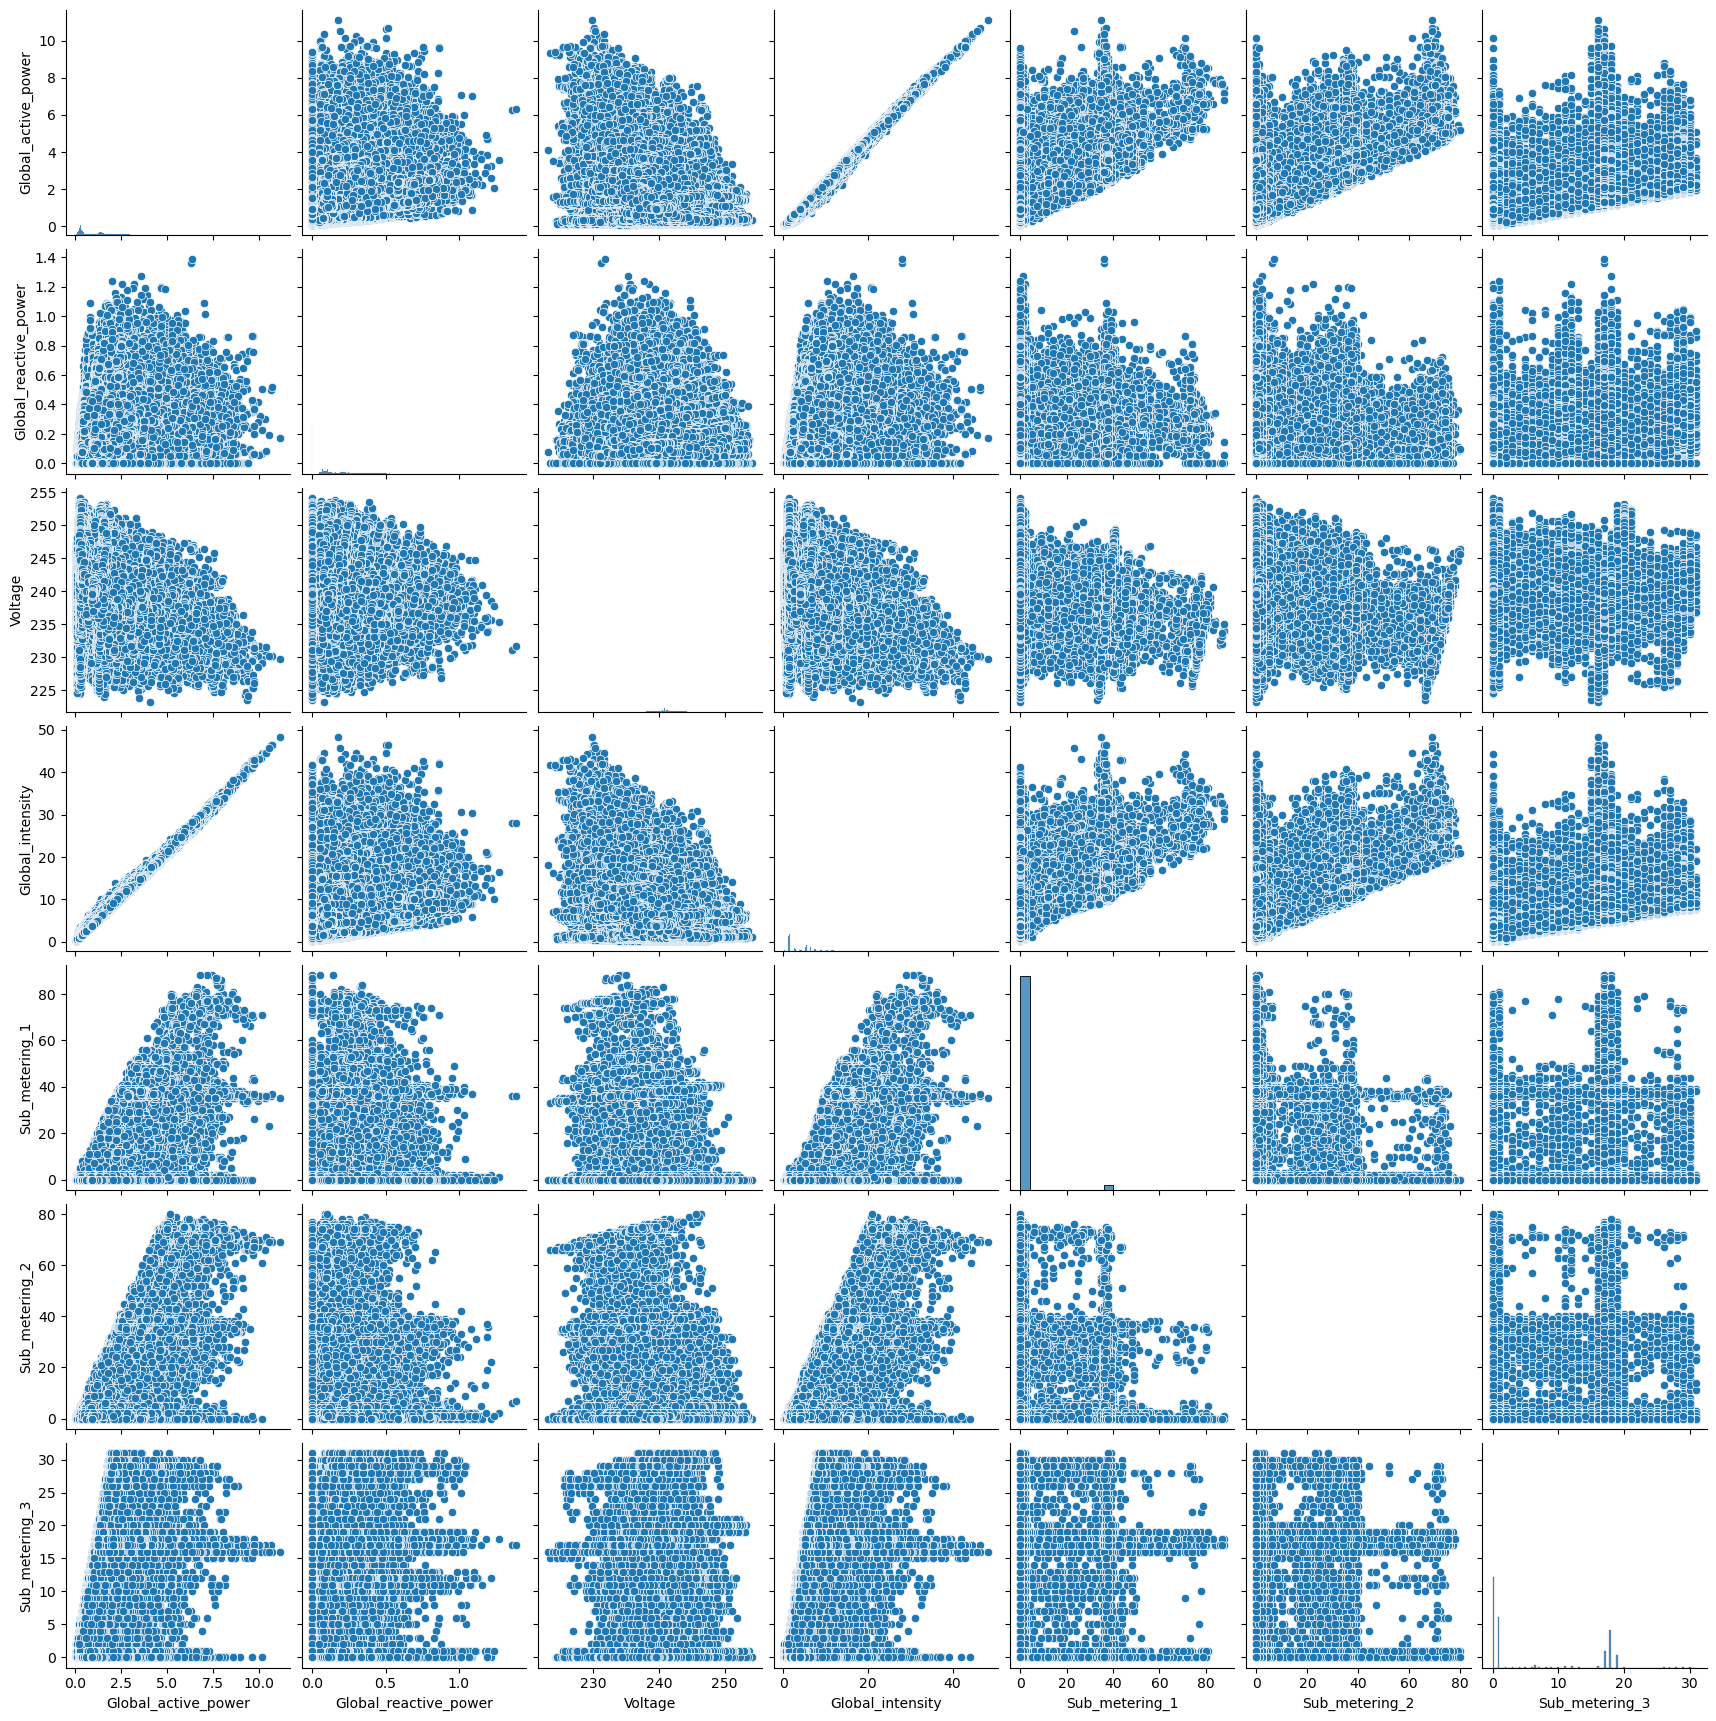

In [193]:
sns.pairplot(df)

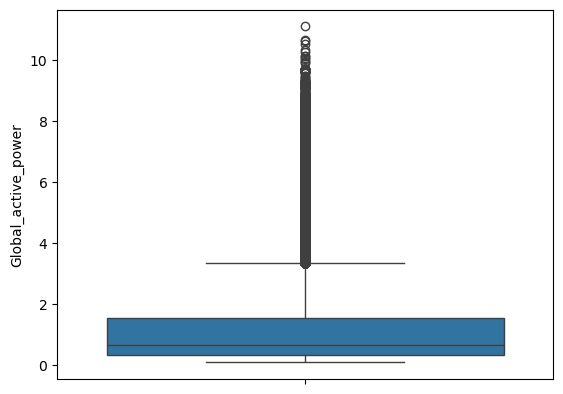

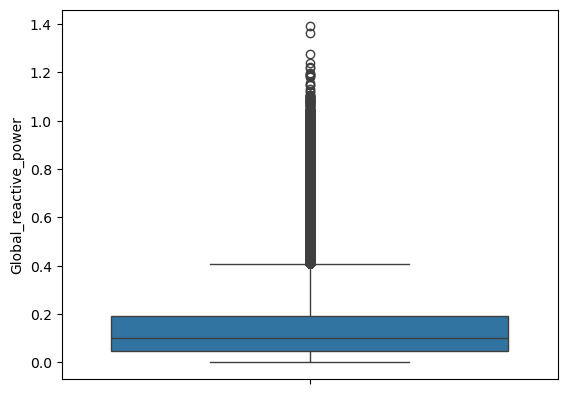

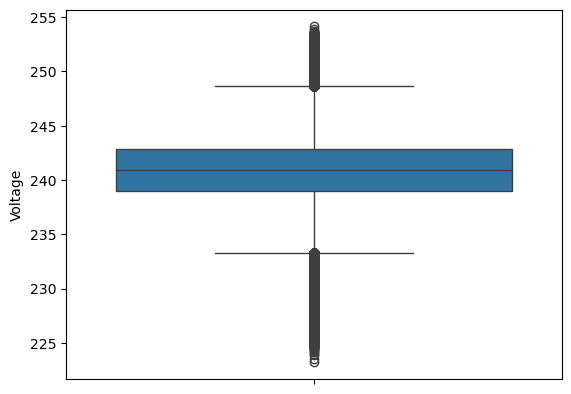

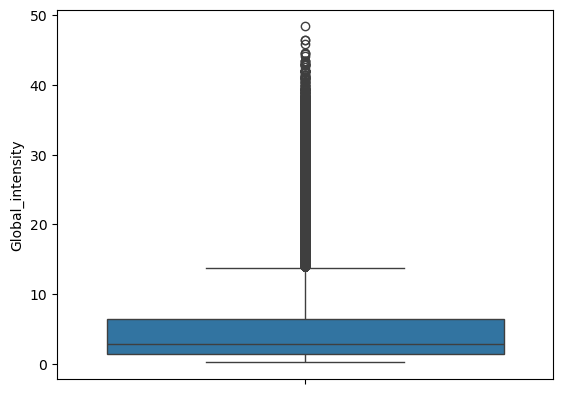

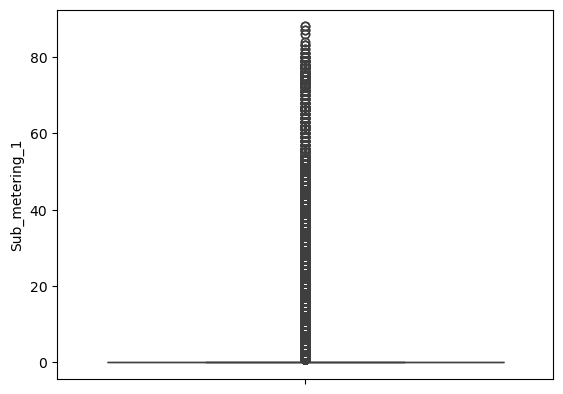

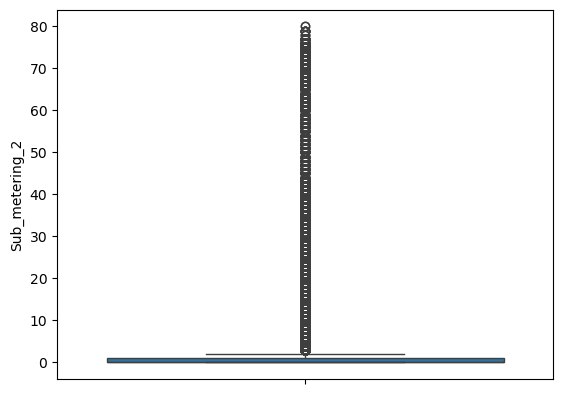

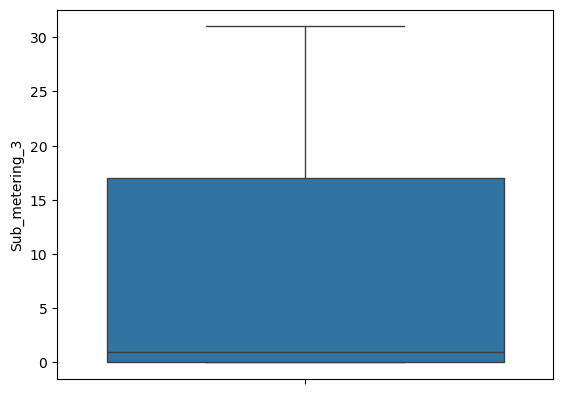

In [71]:
for i in df_cleaned.columns:
    sns.boxplot(df[i])
    plt.show()

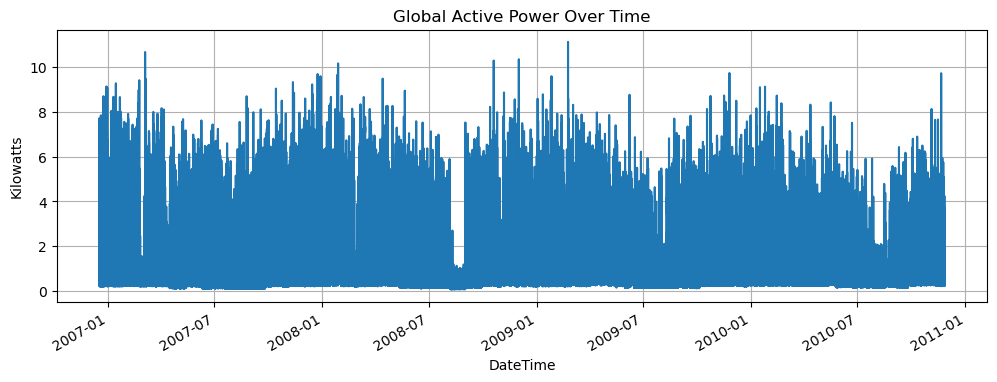

In [73]:
plt.figure(figsize=(12, 4))
df_cleaned['Global_active_power'].plot(title='Global Active Power Over Time')
plt.ylabel('Kilowatts')
plt.grid(True)
plt.show()

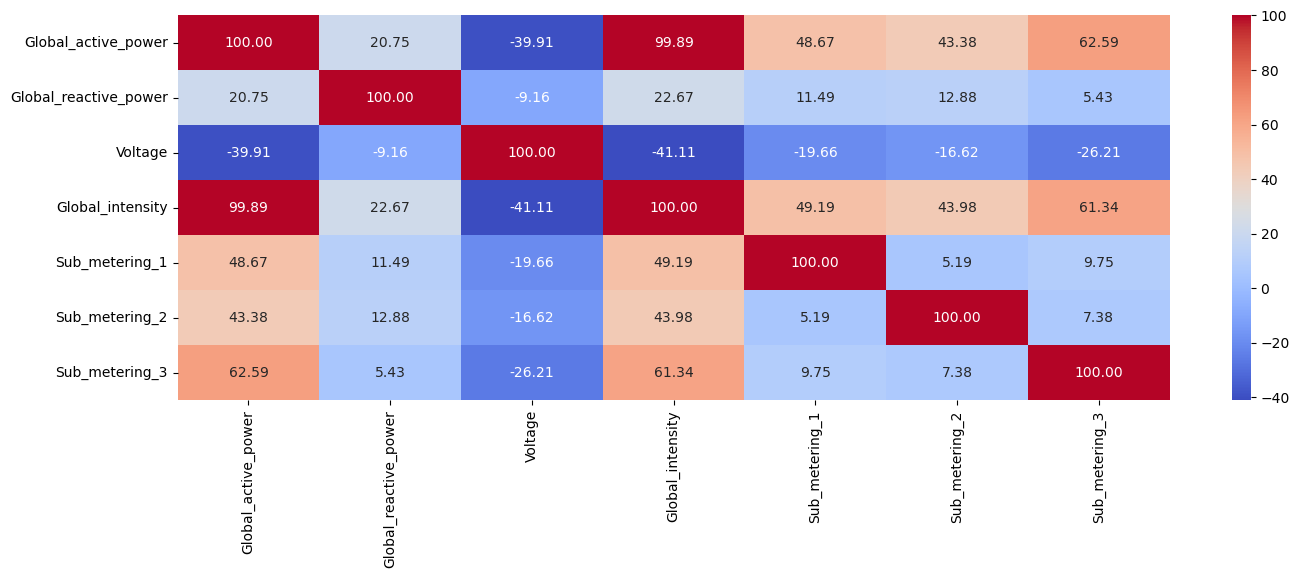

In [75]:

plt.figure(figsize=(16, 5))

sns.heatmap(df_cleaned.corr() * 100,  cmap="coolwarm", annot= True , fmt=".2f" )

plt.show()

In [77]:
df_cleaned

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.000
2010-11-26 20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.000
2010-11-26 21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.000


Rough - Validate data with transformation

In [33]:
std = StandardScaler()

In [35]:
df['std_Voltage'] = std.fit_transform(df[['Voltage']])

In [37]:
df

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,std_Voltage
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,0.000,1.000,17.000,-1.864
2006-12-16 17:25:00,5.360,0.436,233.630,0.000,1.000,16.000,-2.239
2006-12-16 17:26:00,5.374,0.498,233.290,0.000,2.000,17.000,-2.345
2006-12-16 17:27:00,5.388,0.502,233.740,0.000,1.000,17.000,-2.205
2006-12-16 17:28:00,3.666,0.528,235.680,0.000,1.000,17.000,-1.603
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.430,0.000,0.000,0.000,-0.127
2010-11-26 20:59:00,0.944,0.000,240.000,0.000,0.000,0.000,-0.261
2010-11-26 21:00:00,0.938,0.000,239.820,0.000,0.000,0.000,-0.317


In [150]:
df['trfm_Global_reactive_power'] = 1/df['Global_reactive_power']
df['trfm_Voltage'] = 1/df['Voltage']
df['trfm_Sub_metering_1'] = 1/df['Sub_metering_1']
df['trfm_Sub_metering_2'] = 1/df['Sub_metering_2']
df['trfm_Sub_metering_3'] = 1/df['Sub_metering_3']

In [ ]:
df['Global_reactive_power'] = np.sqrt( df['Global_reactive_power'] )
df['Voltage'] = np.sqrt( df['Voltage'] )
df['Sub_metering_1'] = np.sqrt( df['Sub_metering_1'] )
df['Sub_metering_2'] = np.sqrt( df['Sub_metering_2'] )
df['Sub_metering_3'] = np.sqrt( df['Sub_metering_3'] )

In [154]:
df.drop(["trfm_Global_reactive_power", "trfm_Voltage", "trfm_Sub_metering_1", "trfm_Sub_metering_2", "trfm_Sub_metering_3"], axis= 1, inplace= True)

In [158]:
df.drop(["log_Global_reactive_power", "log_Voltage", "log_Sub_metering_1", "log_Sub_metering_2", "log_Sub_metering_3"], axis= 1, inplace= True)

In [19]:
df

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,0.000,1.000,17.000
2006-12-16 17:25:00,5.360,0.436,233.630,0.000,1.000,16.000
2006-12-16 17:26:00,5.374,0.498,233.290,0.000,2.000,17.000
2006-12-16 17:27:00,5.388,0.502,233.740,0.000,1.000,17.000
2006-12-16 17:28:00,3.666,0.528,235.680,0.000,1.000,17.000
...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.430,0.000,0.000,0.000
2010-11-26 20:59:00,0.944,0.000,240.000,0.000,0.000,0.000
2010-11-26 21:00:00,0.938,0.000,239.820,0.000,0.000,0.000


In [54]:
df.drop("Voltage" , axis= 1, inplace= True)

Linear Regression

In [80]:
val = df_cleaned.drop("Global_active_power", axis= 1)

tar = df_cleaned['Global_active_power']


In [82]:
val.head()

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,
2006-12-16 17:24:00,0.418,234.840,18.400,0.000,1.000,17.000
2006-12-16 17:25:00,0.436,233.630,23.000,0.000,1.000,16.000
2006-12-16 17:26:00,0.498,233.290,23.000,0.000,2.000,17.000
2006-12-16 17:27:00,0.502,233.740,23.000,0.000,1.000,17.000
2006-12-16 17:28:00,0.528,235.680,15.800,0.000,1.000,17.000


In [84]:
tar

DateTime
2006-12-16 17:24:00   4.216
2006-12-16 17:25:00   5.360
2006-12-16 17:26:00   5.374
2006-12-16 17:27:00   5.388
2006-12-16 17:28:00   3.666
                       ... 
2010-11-26 20:58:00   0.946
2010-11-26 20:59:00   0.944
2010-11-26 21:00:00   0.938
2010-11-26 21:01:00   0.934
2010-11-26 21:02:00   0.932
Name: Global_active_power, Length: 1906699, dtype: float64

In [86]:
#train and test split

trdata, tsdata, trlab, tslab = train_test_split( val, tar , test_size= 0.20, random_state= 60)

In [87]:
# model init

model = LinearRegression()

In [90]:
# Train model 

model.fit(trdata, trlab)

LinearRegression()

In [92]:
# Training Perfromance 
tr_pred = model.predict(trdata)

In [94]:
mean_squared_error(trlab, tr_pred)

0.0017386900895580582

In [96]:
root_mean_squared_error(trlab, tr_pred)

0.04169760292340626

In [98]:
mean_absolute_error(trlab, tr_pred)

0.026562036894025833

In [100]:
r2_score(trlab, tr_pred)

0.9984806894097711

In [102]:
# Testing Perfromance 

ts_pred = model.predict(tsdata)

In [104]:
mean_squared_error(tslab, ts_pred)

0.0017477626739166503

In [106]:
root_mean_squared_error(tslab, ts_pred)

0.041806251612846734

In [108]:
mean_absolute_error(tslab, ts_pred)

0.02659576714101583

In [110]:
r2_score(tslab, ts_pred)

0.9984708909900396

Decision Tree

<Axes: xlabel='Global_active_power', ylabel='Density'>

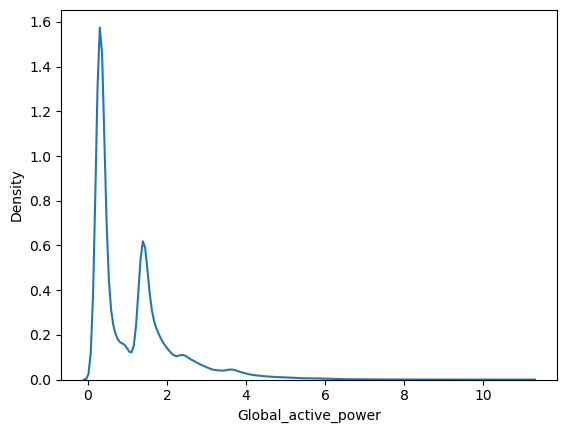

In [112]:
sns.kdeplot(df_cleaned['Global_active_power'])

In [272]:
# DO Oversampling 


#This is continuous data , so we can't do oversampling

In [114]:
# train and test split 


trdata, tsdata, trlab, tslab = train_test_split(val, tar, test_size= 0.20, random_state= 77)

In [116]:
# Model Buildiing Decition Tree


model  = DecisionTreeRegressor(criterion='squared_error',
                                splitter='best',
                                max_depth=8,
                                min_samples_split=2,
                                random_state=98,
  
                               )

In [118]:
model

DecisionTreeRegressor(max_depth=8, random_state=98)

In [120]:
model.fit(trdata, trlab)

DecisionTreeRegressor(max_depth=8, random_state=98)

In [122]:
trpred = model.predict(trdata)
tspred = model.predict(tsdata)

In [124]:
mean_squared_error(trlab, trpred)

0.0016966935804353413

In [126]:
root_mean_squared_error(trlab, trpred)

0.04119094051409049

In [128]:
mean_absolute_error(trlab, trpred)

0.025382084525733102

In [130]:
r2_score(trlab, trpred)

0.9985180213882703

In [132]:
# Testing Perfromance 
mean_squared_error(tslab, tspred)

0.0017115339861973602

In [134]:
root_mean_squared_error(tslab, tspred)

0.04137068994103628

In [136]:
mean_absolute_error(tslab, tspred)

0.02542558843721598

In [138]:
r2_score(tslab, tspred)

0.9985000164452261

In [140]:
para = {
                                "criterion": ['squared_error'],
                                "max_depth": [2, 15, 25, 35],
                                "min_samples_split": [1, 3],
                                "random_state" : [22, 56, 77],
}


gsmodel = DecisionTreeRegressor()

gs = GridSearchCV(estimator= gsmodel, cv = 5, param_grid= para)

gs.fit(trdata, trlab)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [2, 15, 25, 35],
                         'min_samples_split': [1, 3],
                         'random_state': [22, 56, 77]})

In [142]:
gs.best_params_

{'criterion': 'squared_error',
 'max_depth': 15,
 'min_samples_split': 3,
 'random_state': 77}

In [144]:
gs.best_estimator_

DecisionTreeRegressor(max_depth=15, min_samples_split=3, random_state=77)

In [146]:
trpred = gs.best_estimator_.predict(trdata)
tspred = gs.best_estimator_.predict(tsdata)

In [148]:
r2_score(trlab, trpred)

0.9992233076175763

In [150]:
r2_score(tslab, tspred)

0.9989884152462687

Random Forest

In [152]:
fs  = RandomForestRegressor(n_estimators= 501,
                                criterion='squared_error',
                                max_depth=3,
                                min_samples_split=2,
                                random_state=98,
    
                               )

In [154]:
fs.fit(val, tar)

RandomForestRegressor(max_depth=3, n_estimators=501, random_state=98)

In [156]:
fs.fit(trdata, trlab)

RandomForestRegressor(max_depth=3, n_estimators=501, random_state=98)

In [158]:
trpred = fs.predict(trdata)
tspred = fs.predict(tsdata)

In [159]:
r2_score(trlab, trpred)

0.9733914826265639

In [162]:
r2_score(tslab, tspred)

0.9732845490916516

Gradient Boost

In [164]:
trdata, tsdata, trlab, tslab = train_test_split(val, tar, test_size= 0.20, random_state= 77)

In [166]:
model  = GradientBoostingRegressor(  
    
    learning_rate=0.1,
    n_estimators=100,
    criterion='squared_error',
    max_depth=3,
    random_state=42,
     
                               )

In [168]:
model

GradientBoostingRegressor(criterion='squared_error', random_state=42)

In [170]:
model.fit(trdata, trlab)

GradientBoostingRegressor(criterion='squared_error', random_state=42)

In [172]:
trpred = model.predict(trdata)
tspred = model.predict(tsdata)

In [173]:
r2_score(trlab, trpred)

0.9989013931619225

In [176]:
r2_score(tslab, tspred)

0.998895117089765

In [ ]:
#Linear Regression (Training perf - 0.99848 , Testing perf - 0.99847)
#Decision Tree     (Training perf - 0.99922 , Testing perf - 0.99898)
#Random Forest     (Training perf - 0.97339 , Testing perf - 0.97328)
#Gradient Boost    (Training perf - 0.99890 , Testing perf - 0.99889)

#Decision Tree is my best performing model compared to other three models for PowerPulse: Household Energy Usage Forecast